In [1]:
import sys
sys.path.insert(0, '../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd

#### Build database

In [2]:
data = pd.read_csv('./data/diabetes_sinc_1000_loc_cov.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,location_id,X,sex,age_start,age_end,year_start,year_end,mean,standard_error,measure,ow,bmi,fpg,location_name,region_name
0,0,1,8,913,Female,60,99.000,2001,2002,0.000010,0.000100,Sincidence,0.367407,23.525415,5.884486,Taiwan,East Asia
1,1,2,8,441,Female,45,59.000,2005,2006,0.000010,0.000100,Sincidence,0.434376,23.969006,5.534053,Taiwan,East Asia
2,2,3,8,464,Male,0,0.999,2016,2016,0.000000,0.000012,prevalence,0.000000,25.215980,0.000000,Taiwan,East Asia
3,3,4,8,375,Male,15,29.000,2007,2008,0.000031,0.000100,Sincidence,0.327989,24.704975,1.826869,Taiwan,East Asia
4,4,5,8,956,Male,15,29.000,2001,2002,0.000032,0.000100,Sincidence,0.265633,23.871868,1.606499,Taiwan,East Asia


In [4]:
integrand = ['Sincidence']
locations = ['Australia', 'New Zealand']
rates = ['iota']
meas_noise_density = {'Sincidence': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-16,'mean': .01},\
    {'density': 'gaussian', 'mean':0.0, 'std': .3},\
    {'density': 'gaussian', 'mean':0.0, 'std': .1})]
rates_child_priors = [
    # rate priors for iota
    ({'density':'gaussian','mean': 0.0, 'std': 1},\
    {'density': 'gaussian', 'mean':0.0, 'std': 1},\
    {'density': 'gaussian', 'mean':0.0, 'std': 1})]
covariates = [{'name':'bmi','type': 'rate_value','effected': 'iota'},
             {'name': 'ow', 'type': 'rate_value', 'effected': 'iota'}]
cov_priors = [({'density':'uniform','mean': 0.0},{'density':'gaussian','mean':0.0,'std':.1},\
             {'density':'gaussian','mean':0.0,'std':.1}),
             ({'density':'uniform','mean': 0.0},{'density':'gaussian','mean':0.0,'std':1},\
             {'density':'gaussian','mean':0.0,'std': 1})]
#---------change path------------
path = './data/incidence_two_level_cov.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density,path, covariates=covariates, cov_priors=cov_priors)

#### Train model

In [5]:
model = TwoLevel(db)

In [6]:
model.fit_both(tol=1e-10, max_iter=200)

/home/prefix/dismod_at.release/bin/dismod_at ./data/incidence_two_level_cov.db init
./data/incidence_two_level_cov.db fit fixed
./data/incidence_two_level_cov.db set start_var fit_var
./data/incidence_two_level_cov.db fit both
./data/incidence_two_level_cov.db predict fit_var


#### Plots

In [7]:
path = './data/'
plt = PlotTwoLevel(path, 'incidence_two_level_cov.db')

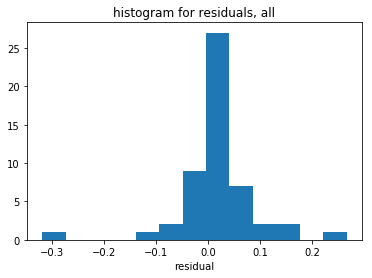

In [8]:
plt.plot_residuals('all')

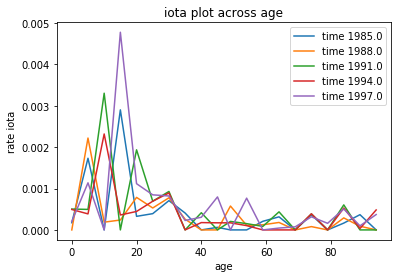

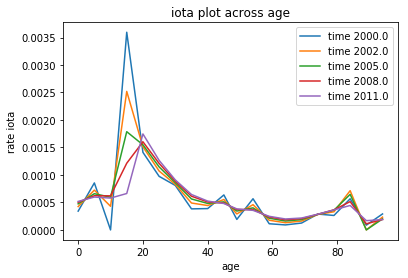

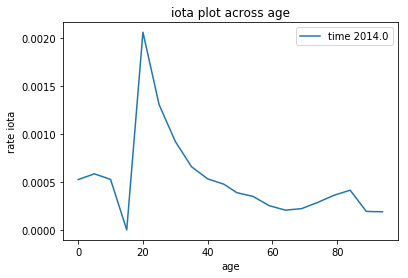

In [9]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', 'all', plot_data=False)

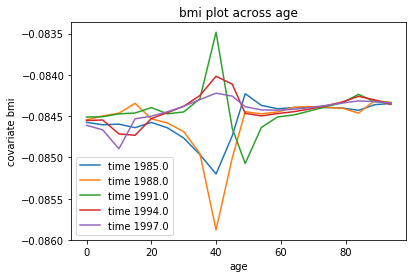

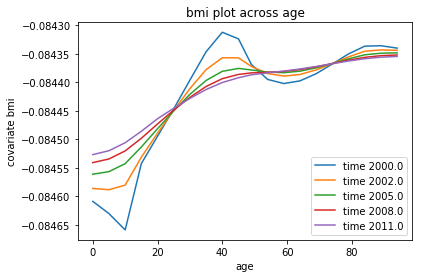

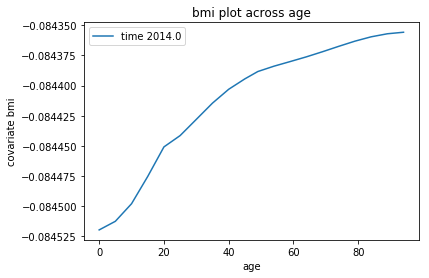

In [10]:
plt.plot_change_over_age('covariate', 'bmi', 'Sincidence', 'all', plot_data=False)

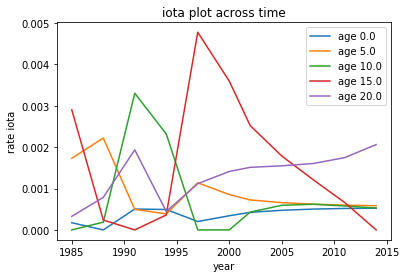

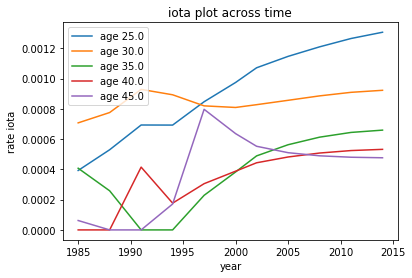

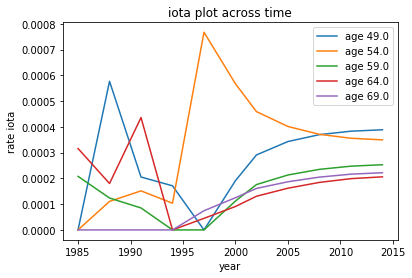

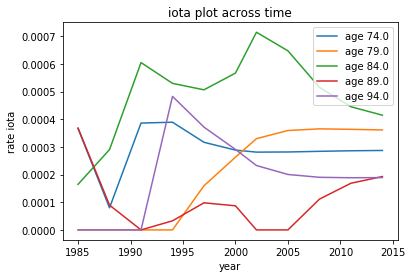

In [11]:
plt.plot_change_over_time('rate', 'iota', 'Sincidence', 'all', plot_data=False)

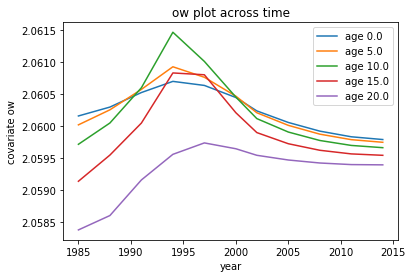

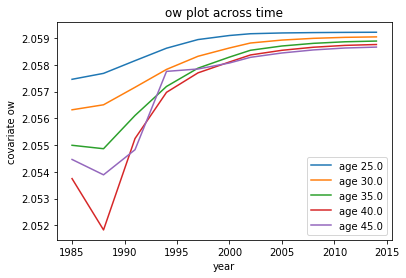

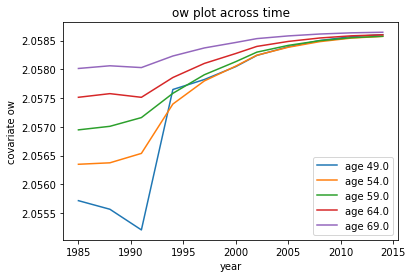

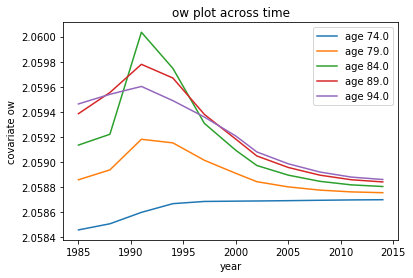

In [12]:
plt.plot_change_over_time('covariate', 'ow', 'Sincidence', 'all', plot_data=False)